In [22]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df=pd.read_csv('data/ECommerce_consumer behaviour.csv')
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [25]:
df.isna().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [26]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


In [27]:
df['days_since_prior_order'] = df['days_since_prior_order'].fillna('0')
df['days_since_prior_order']=df['days_since_prior_order'].astype(int)

In [28]:
df.isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

In [29]:
# Create a dictionary mapping the integers to the day of the week names
dow_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

# Use the map method to map the integer values to the day of the week names
df['order_dow'] = df['order_dow'].map(dow_map)

# Group the data by day of the week and apply the count aggregation function
#df_dow = df.groupby('order_dow')['user_id'].agg(['count'])

In [30]:
df['order_dow']

0            Tuesday
1            Tuesday
2            Tuesday
3            Tuesday
4            Tuesday
             ...    
2019496    Wednesday
2019497      Tuesday
2019498      Tuesday
2019499      Tuesday
2019500      Tuesday
Name: order_dow, Length: 2019501, dtype: object

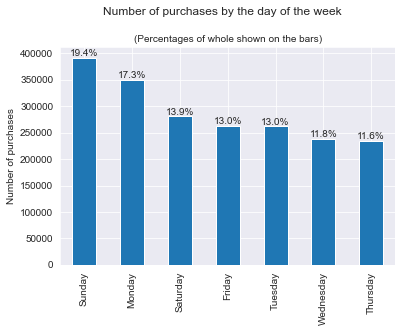

In [49]:
# Calculate the number of purchases for each day of the week
counts = df['order_dow'].value_counts()

# Calculate the percentage of the whole for each value
percentages = counts / counts.sum()

# Create the bar plot
ax = counts.plot.bar()

# Add the percentage labels to the plot
for i, value in enumerate(counts.values):
    ax.text(i, value, f"{percentages[i]:.1%}", ha='center', va='bottom')

# Make the x-axis tick labels vertical
plt.xticks(rotation=90)
# Add a title to the plot
plt.suptitle('Number of purchases by the day of the week', y=1.02)
# Add a subtitle to the plot
plt.title('(Percentages of whole shown on the bars)', fontsize=10)
# Add a label to the y-axis
plt.ylabel('Number of purchases')


In [32]:
def order_time(x):
    time_of_day = {
        6: '6 am',
        7: '7 am',
        8: '8 am',
        9: '9 am',
        10: '10 am',
        11: '11 am',
        12: '12 pm',
        13: '1 pm',
        14: '2 pm',
        15: '3 pm',
        16: '4 pm',
        17: '5 pm',
        18: '6 pm',
        19: '7 pm',
        20: '8 pm',
        21: '9 pm',
        22: '10 pm',
        23: '11 pm',
        0: '12 am',
        1: '1 am',
        2: '2 am',
        3: '3 am',
        4: '4 am',
        5: '5 am'
    }
    return time_of_day.get(x)


In [33]:
df['time_of_day'] = df['order_hour_of_day'].apply(order_time)

In [34]:
counts = df['time_of_day'].value_counts()

In [35]:
counts = counts.reindex(['12 am',
                     '1 am', 
                     '2 am', 
                     '3 am', 
                     '4 am', 
                     '5 am', 
                     '6 am', 
                     '7 am', 
                     '8 am',
                     '9 am', 
                     '10 am', 
                     '11 am', 
                     '12 pm',
                     '1 pm',
                     '2 pm', 
                     '3 pm', 
                     '4 pm', 
                     '5 pm', 
                     '6 pm', 
                     '7 pm', 
                     '8 pm',
                     '9 pm', 
                     '10 pm', 
                     '11 pm'])

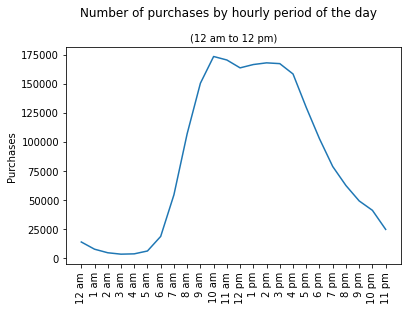

<Figure size 432x288 with 0 Axes>

In [36]:

plt.plot(counts.index, counts.values)
# Make the x-axis tick labels vertical
plt.xticks(rotation=90)
# Add a title to the plot
plt.suptitle('Number of purchases by hourly period of the day', y=1.02)
# Add a subtitle to the plot
plt.title('(12 am to 12 pm)', fontsize=10)
# Add a label to the y-axis
plt.ylabel('Purchases')
# Show the plot
plt.show()

In [37]:
def order_time_general(x):
    if x in [6,7,8,9,10,11,12]:
        return 'The order was made in the morning'
    if x in [13,14,15,16,17]:
        return 'The order was made in the afternoon'
    if x in [18,19,20,21,22]:
        return 'The order was made in the evening'
    if x in [23,24,0,1,2,3,4,5]:
        return 'The order was made at night'
    return x

In [38]:
df['order_time_general']=df['order_hour_of_day'].apply(order_time_general)

In [39]:
pivot = df.pivot_table(index='order_dow', columns='order_time_general', values='user_id', aggfunc=['count'])

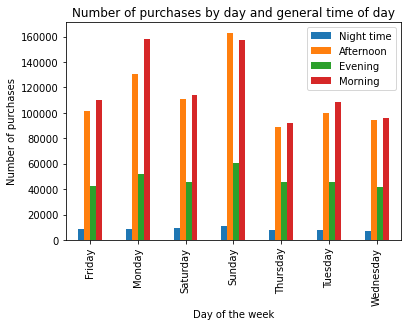

In [40]:
ax = pivot.plot(kind='bar')
ax.set_title('Number of purchases by day and general time of day')
ax.set_xlabel('Day of the week')
ax.set_ylabel('Number of purchases')
ax.legend(['Night time', 'Afternoon', 'Evening', 'Morning'])

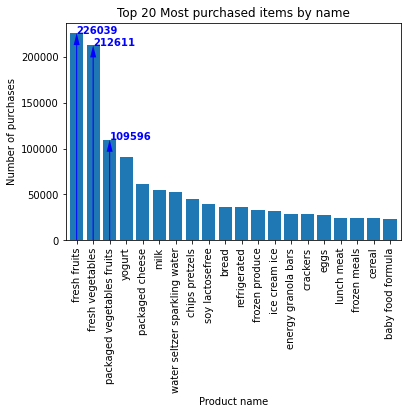

<Figure size 432x288 with 0 Axes>

In [41]:
counts = df['product_name'].value_counts().head(20)
# Plot the counts as a bar plot
ax = counts.plot.bar()

# Customize the plot
ax = counts.plot.bar(width=0.8)  # Increase the bar width
ax.set_title('Top 20 Most purchased items by name')
ax.set_xlabel('Product name')
ax.set_ylabel('Number of purchases')

# Add text labels to the first three bars
for i, v in enumerate(counts[:3]):
    ax.text(i, v + 0.1, str(v), color='blue', fontweight='bold')
    ax.annotate('', xy=(i, v), xytext=(i, 0), arrowprops=dict(facecolor='blue', edgecolor='none', width=1, headwidth=6))


# Show the plot
plt.show()

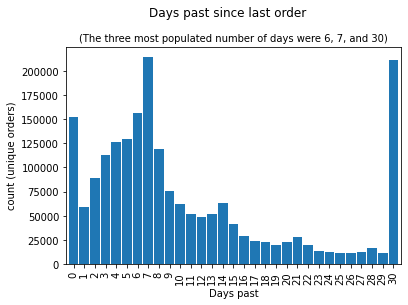

<Figure size 432x288 with 0 Axes>

In [42]:
counts = df['days_since_prior_order'].value_counts()
counts = counts.sort_index()
ax = counts.plot.bar()

# Customize the plot
ax = counts.plot.bar(width=0.9)  # Increase the bar width
# Add a title to the plot
plt.suptitle('Days past since last order', y=1.02)

ax.set_xlabel('Days past')
ax.set_ylabel('count (unique orders)')

# Find the top three highest count bars
top_three = counts.nlargest(3)
plt.title('(The three most populated number of days were 6, 7, and 30)', fontsize=10)


# Show the plot
plt.show()

In [43]:
df['add_to_cart_order'].value_counts()

1      200000
2      190134
3      178480
4      165743
5      151983
        ...  
113         1
112         1
111         1
110         1
137         1
Name: add_to_cart_order, Length: 137, dtype: int64

/Users/kalampark/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


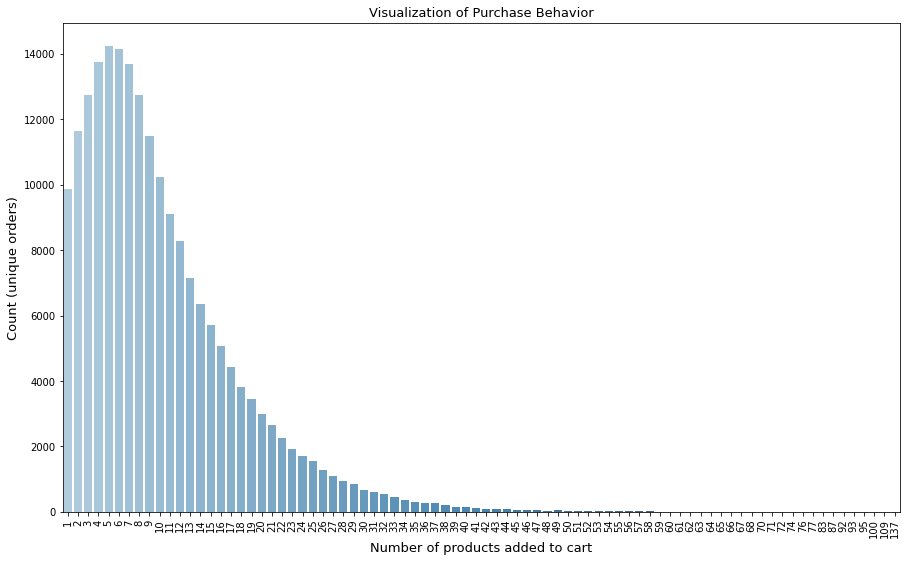

<Figure size 432x288 with 0 Axes>

In [44]:
grouped = df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

f, ax = plt.subplots(figsize=(15, 9))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values, palette='Blues_d')
plt.title('Visualization of Purchase Behavior', fontsize=13)
plt.ylabel('Count (unique orders)', fontsize=13)
plt.xlabel('Number of products added to cart', fontsize=13)
plt.show()

/Users/kalampark/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


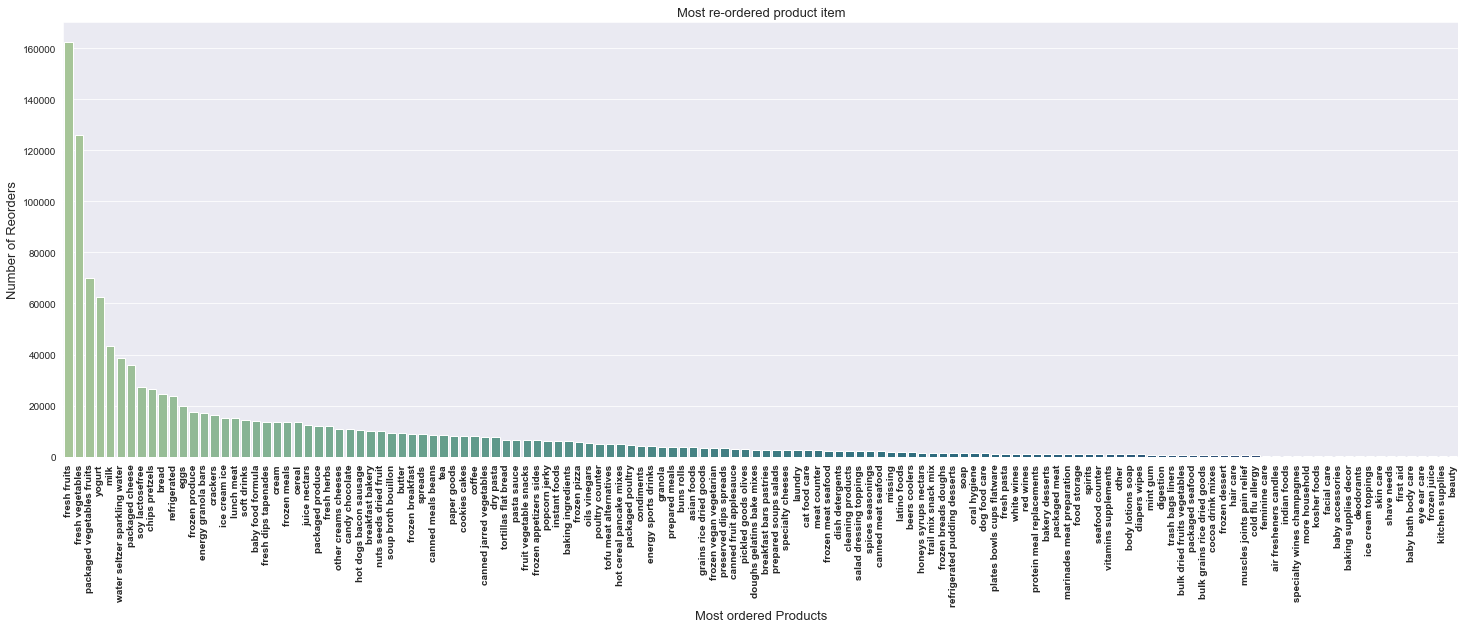

<Figure size 432x288 with 0 Axes>

In [45]:
grouped  = df.groupby(['product_name']).sum()['reordered'].sort_values(ascending=False)

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(25, 8))
plt.xticks(rotation='vertical', fontweight='bold')
sns.barplot(grouped.index, grouped.values, palette='crest')
plt.title('Most re-ordered product item', fontsize=13)
plt.ylabel('Number of Reorders', fontsize=13)
plt.xlabel('Most ordered Products', fontsize=13)
plt.show()

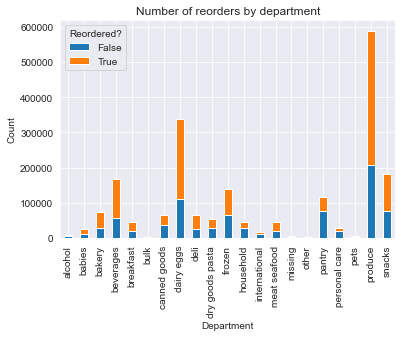

<Figure size 432x288 with 0 Axes>

In [46]:
# Create a pivot table to calculate the proportion of reorders and non-reorders for each department
table = pd.pivot_table(df, index='department', columns='reordered', values='user_id', aggfunc='count')

# Plot the pivot table as a stacked bar plot
table.plot.bar(stacked=True)

# Customize the plot
plt.xlabel('Department')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.title('Number of reorders by department')  # Set the title
plt.legend(['False', 'True'], title='Reordered?')

# Show the plot
plt.show()

In [47]:
df_factorized = df.copy()
df_factorized['department']=pd.factorize(df_factorized.department)[0]
df_factorized['product_name']=pd.factorize(df_factorized.product_name)[0]
df_factorized['order_hour_of_day']=pd.factorize(df_factorized.order_hour_of_day)[0]
df_factorized['order_time_general']=pd.factorize(df_factorized.order_time_general)[0]

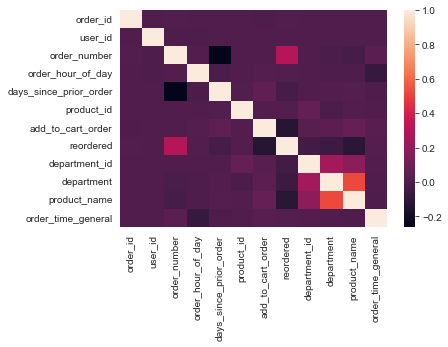

In [48]:
sns.heatmap(df_factorized.corr())